In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
housing = fetch_california_housing()

In [3]:
X_train_full, X_test, y_train_full,  y_test = train_test_split(housing.data, housing.target, test_size=0.2)

In [4]:
X_train, X_val, y_train,  y_val = train_test_split(X_train_full, y_train_full, test_size=0.2)

In [5]:
scaler = StandardScaler()

In [6]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',
                      input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

In [8]:
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_val, y_val))

Epoch 1/20
413/413 [==============================] - 0s 528us/step - loss: 1.2497 - val_loss: 6.2807
Epoch 2/20
413/413 [==============================] - 0s 468us/step - loss: 2.8126 - val_loss: 0.5393
Epoch 3/20
413/413 [==============================] - 0s 421us/step - loss: 0.5071 - val_loss: 0.4598
Epoch 4/20
413/413 [==============================] - 0s 391us/step - loss: 0.4227 - val_loss: 0.7915
Epoch 5/20
413/413 [==============================] - 0s 381us/step - loss: 0.4259 - val_loss: 0.4497
Epoch 6/20
413/413 [==============================] - 0s 388us/step - loss: 0.4270 - val_loss: 0.4284
Epoch 7/20
413/413 [==============================] - 0s 393us/step - loss: 0.3968 - val_loss: 0.4165
Epoch 8/20
413/413 [==============================] - 0s 391us/step - loss: 0.3869 - val_loss: 0.4061
Epoch 9/20
413/413 [==============================] - 0s 389us/step - loss: 0.3849 - val_loss: 0.4147
Epoch 10/20
413/413 [==============================] - 0s 388us/step - loss: 0.379

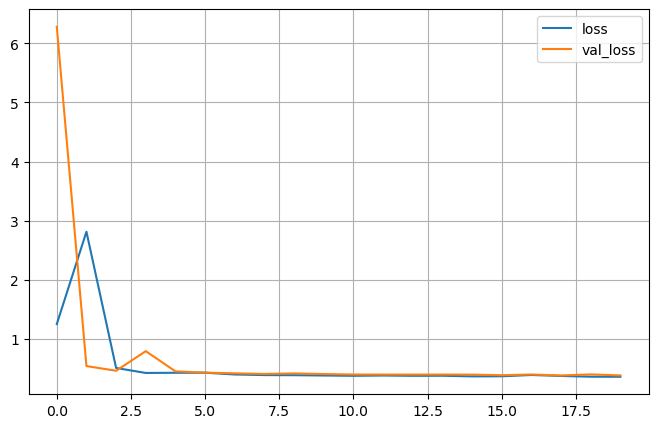

In [9]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid();

In [10]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 287us/step - loss: 0.3717


0.37166085839271545

In [11]:
y_pred = model.predict(X_test)

129/129 [==============================] - 0s 278us/step


In [12]:
y_pred

array([[1.7256073 ],
       [1.5441519 ],
       [1.1125907 ],
       ...,
       [0.91474617],
       [1.0197502 ],
       [1.3141868 ]], dtype=float32)